In [1]:
%cd VideoMAEv2

/home/exouser/VideoMAEv2


In [2]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0))

True
GRID A100X-40C


In [3]:
import os

current_dir = os.getcwd()
print("Current Directory:", current_dir)

Current Directory: /home/exouser/VideoMAEv2


In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt
def parse_log_file(filepath):
    with open(filepath, 'r') as f:
        lines = f.readlines()
    
    epochs = []
    val_acc1 = []
    val_acc5 = []
    val_loss = []
    
    for line in lines[:-1]:  # Excluding the final line
        data = json.loads(line)
        epochs.append(data["epoch"])
        val_acc1.append(data["val_acc1"])
        val_acc5.append(data["val_acc5"])
        val_loss.append(data["val_loss"])
    
    final_data = json.loads(lines[-1])
    final_top1 = final_data["Final top-1"]
    final_top5 = final_data["Final Top-5"]
    
    return epochs, val_acc1, val_acc5, val_loss, final_top1, final_top5

def autolabel(rects, ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


In [4]:
import json

def parse_log_file(filepath):
    with open(filepath, 'r') as f:
        lines = f.readlines()
    
    epochs = []
    val_acc1 = []
    val_acc5 = []
    val_loss = []
    
    for line in lines[:-1]:  # Excluding the final line
        data = json.loads(line)
        epochs.append(data["epoch"])
        val_acc1.append(data["val_acc1"])
        val_acc5.append(data["val_acc5"])
        val_loss.append(data["val_loss"])
    
    final_data = json.loads(lines[-1])
    final_top1 = final_data["Final top-1"]
    final_top5 = final_data["Final Top-5"]
    
    return epochs, val_acc1, val_acc5, val_loss, final_top1, final_top5

# For each folder path, call the parse function
vit_b_tiktok_data = parse_log_file('work_dir/vit_b_tiktok6000_ucf101_1_ft/log.txt')
vit_b_ucf101_initial_data = parse_log_file('work_dir/vit_b_ucf101_initial_ucf101_1_ft/log.txt')
vit_b_ucf101_data = parse_log_file('work_dir/vit_b_ucf101_ucf101_1_ft/log.txt')


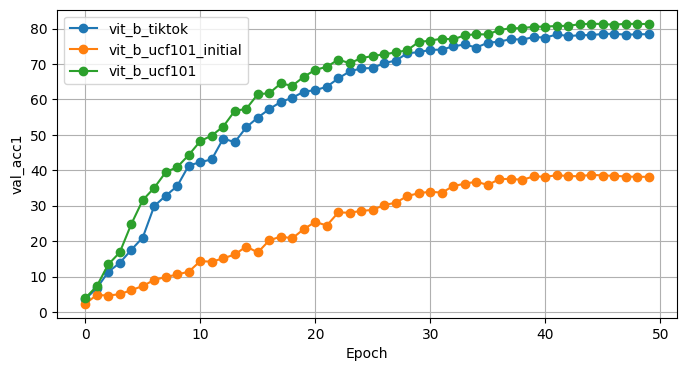

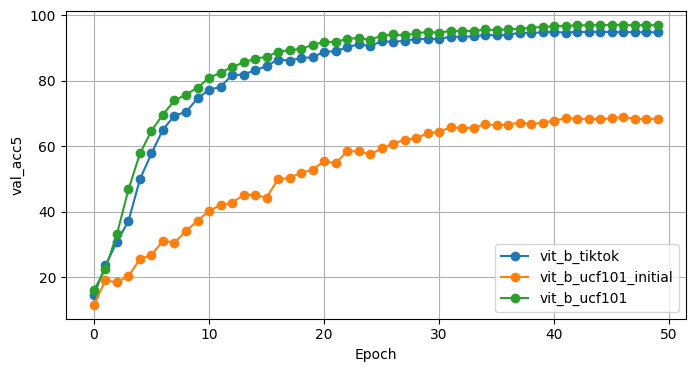

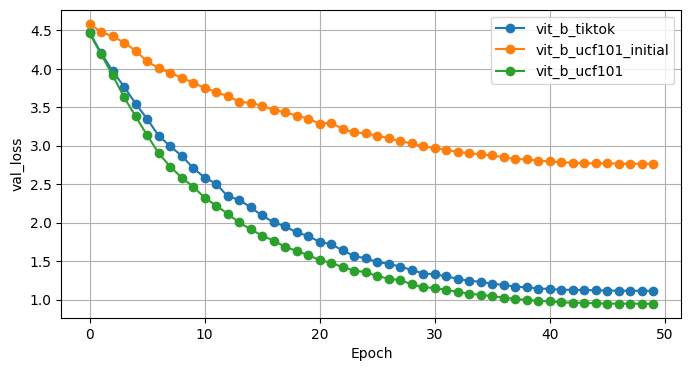

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you've already run the file parsing code above and have vit_b_tiktok_data, vit_b_ucf101_initial_data, and vit_b_ucf101_data

def plot_data(ylabel, *datasets):
    plt.figure(figsize=(8, 4))
    for data, label in datasets:
        plt.plot(data, label=label, marker='o')
    plt.xlabel('Epoch')
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot val_acc1 by epochs
plot_data('val_acc1',
          (vit_b_tiktok_data[1], 'vit_b_tiktok'),
          (vit_b_ucf101_initial_data[1], 'vit_b_ucf101_initial'),
          (vit_b_ucf101_data[1], 'vit_b_ucf101'))

# Plot val_acc5 by epochs
plot_data('val_acc5',
          (vit_b_tiktok_data[2], 'vit_b_tiktok'),
          (vit_b_ucf101_initial_data[2], 'vit_b_ucf101_initial'),
          (vit_b_ucf101_data[2], 'vit_b_ucf101'))

# Plot val_loss by epochs
plot_data('val_loss',
          (vit_b_tiktok_data[3], 'vit_b_tiktok'),
          (vit_b_ucf101_initial_data[3], 'vit_b_ucf101_initial'),
          (vit_b_ucf101_data[3], 'vit_b_ucf101'))


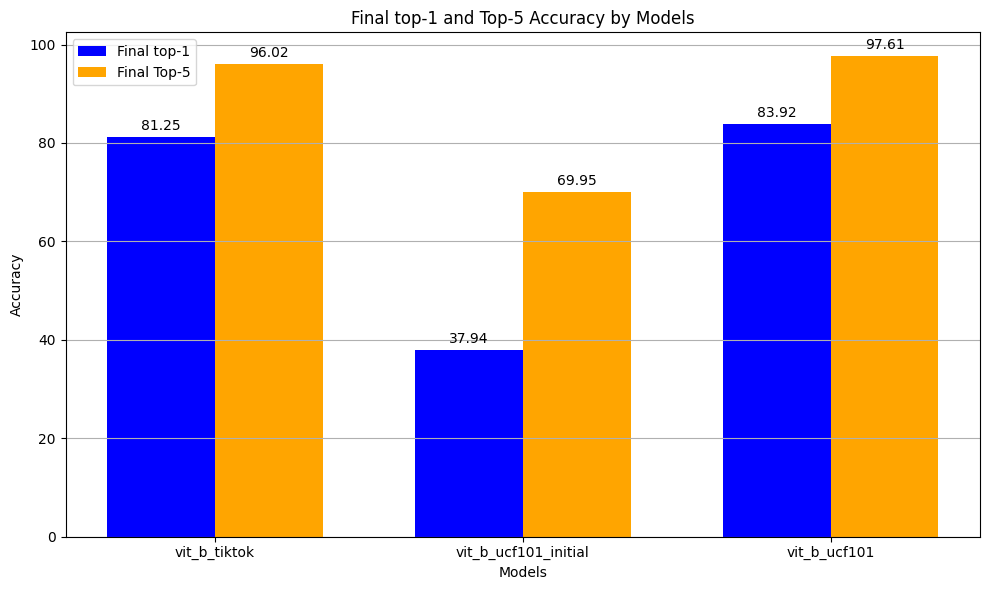

In [7]:
def autolabel(rects, ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# 柱状图 for Final top-1 and Top-5
labels = ['vit_b_tiktok', 'vit_b_ucf101_initial', 'vit_b_ucf101']
final_top1 = [vit_b_tiktok_data[4], vit_b_ucf101_initial_data[4], vit_b_ucf101_data[4]]
final_top5 = [vit_b_tiktok_data[5], vit_b_ucf101_initial_data[5], vit_b_ucf101_data[5]]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, final_top1, width, label='Final top-1', color='blue')
rects2 = ax.bar(x + width/2, final_top5, width, label='Final Top-5', color='orange')

# Add the actual numbers on top of the bars
autolabel(rects1, ax)
autolabel(rects2, ax)

ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Final top-1 and Top-5 Accuracy by Models')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid(axis='y')

plt.tight_layout()
plt.show()


In [4]:
import json

def parse_log_file(filepath):
    with open(filepath, 'r') as f:
        lines = f.readlines()
    
    epochs = []
    val_acc1 = []
    val_acc5 = []
    val_loss = []
     
    for line in lines[:-1]:  # Excluding the final line
        data = json.loads(line)
        epochs.append(data["epoch"])
        val_acc1.append(data["val_acc1"])
        val_acc5.append(data["val_acc5"])
        val_loss.append(data["val_loss"])
    
    final_data = json.loads(lines[-1])
    final_top1 = final_data["Final top-1"]
    final_top5 = final_data["Final Top-5"]
    
    return epochs, val_acc1, val_acc5, val_loss, final_top1, final_top5

# For each folder path, call the parse function
vit_b_tiktok_data = parse_log_file('work_dir/vit_b_tiktok6000_ucf101_1_ft/log.txt')
vit_b_tiktok_numsample4_data = parse_log_file('work_dir/vit_b_tiktok6000_numsample4_ucf101_ft/log.txt')
vit_b_tiktok_epoch300_data = parse_log_file('work_dir/vit_b_tiktok6000_ucf101_300epoch_ft/log.txt')

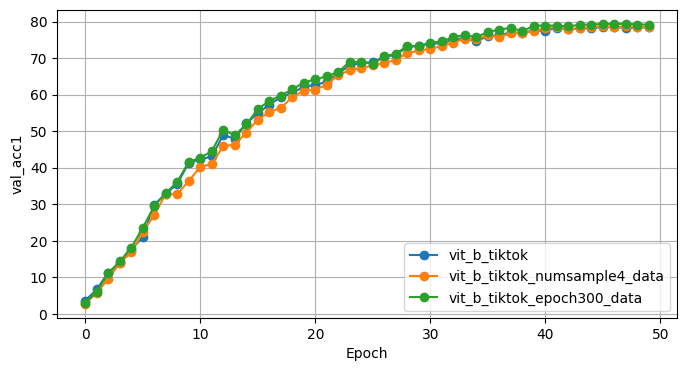

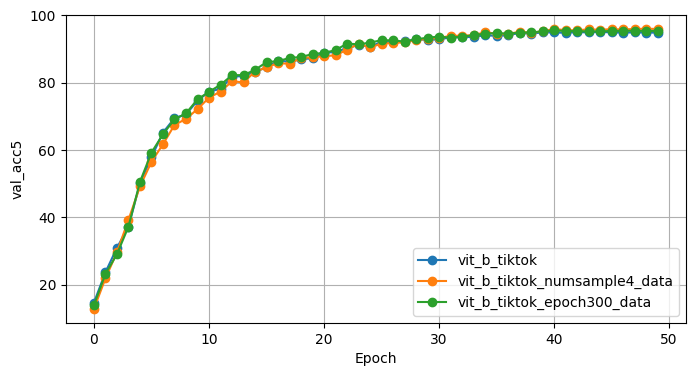

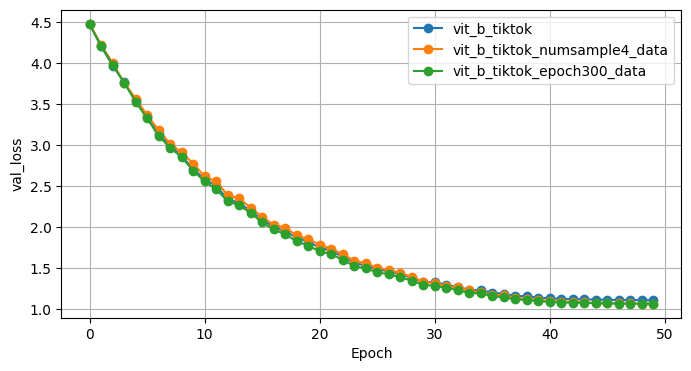

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you've already run the file parsing code above and have vit_b_tiktok_data, vit_b_ucf101_initial_data, and vit_b_ucf101_data

def plot_data(ylabel, *datasets):
    plt.figure(figsize=(8, 4))
    for data, label in datasets:
        plt.plot(data, label=label, marker='o')
    plt.xlabel('Epoch')
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot val_acc1 by epochs
plot_data('val_acc1',
          (vit_b_tiktok_data[1], 'vit_b_tiktok'),
          (vit_b_tiktok_numsample4_data[1], 'vit_b_tiktok_numsample4_data'),
          (vit_b_tiktok_epoch300_data[1], 'vit_b_tiktok_epoch300_data'))

# Plot val_acc5 by epochs
plot_data('val_acc5',
          (vit_b_tiktok_data[2], 'vit_b_tiktok'),
          (vit_b_tiktok_numsample4_data[2], 'vit_b_tiktok_numsample4_data'),
          (vit_b_tiktok_epoch300_data[2], 'vit_b_tiktok_epoch300_data'))

# Plot val_loss by epochs
plot_data('val_loss',
          (vit_b_tiktok_data[3], 'vit_b_tiktok'),
          (vit_b_tiktok_numsample4_data[3], 'vit_b_tiktok_numsample4_data'),
          (vit_b_tiktok_epoch300_data[3], 'vit_b_tiktok_epoch300_data'))

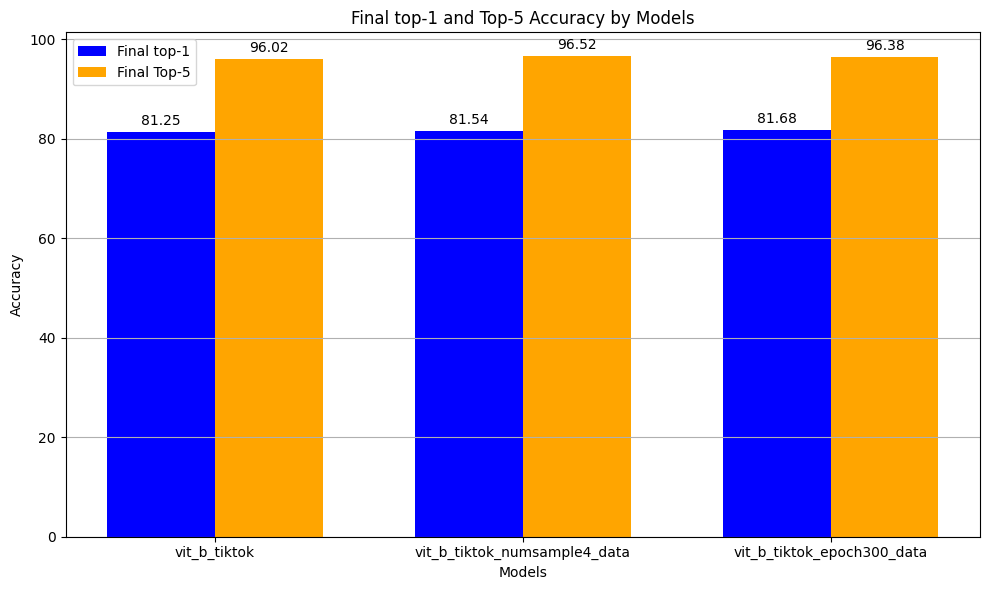

In [7]:
def autolabel(rects, ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# 柱状图 for Final top-1 and Top-5
labels = ['vit_b_tiktok', 'vit_b_tiktok_numsample4_data', 'vit_b_tiktok_epoch300_data']
final_top1 = [vit_b_tiktok_data[4], vit_b_tiktok_numsample4_data[4], vit_b_tiktok_epoch300_data[4]]
final_top5 = [vit_b_tiktok_data[5], vit_b_tiktok_numsample4_data[5], vit_b_tiktok_epoch300_data[5]]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, final_top1, width, label='Final top-1', color='blue')
rects2 = ax.bar(x + width/2, final_top5, width, label='Final Top-5', color='orange')

# Add the actual numbers on top of the bars
autolabel(rects1, ax)
autolabel(rects2, ax)

ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Final top-1 and Top-5 Accuracy by Models')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid(axis='y')

plt.tight_layout()
plt.show()

In [8]:
import json
import numpy as np
import matplotlib.pyplot as plt
def parse_log_file(filepath):
    with open(filepath, 'r') as f:
        lines = f.readlines()
    
    epochs = []
    val_acc1 = []
    val_acc5 = []
    val_loss = []
    
    for line in lines[:-1]:  # Excluding the final line
        data = json.loads(line)
        epochs.append(data["epoch"])
        val_acc1.append(data["val_acc1"])
        val_acc5.append(data["val_acc5"])
        val_loss.append(data["val_loss"])
    
    final_data = json.loads(lines[-1])
    final_top1 = final_data["Final top-1"]
    final_top5 = final_data["Final Top-5"]
    
    return epochs, val_acc1, val_acc5, val_loss, final_top1, final_top5

vit_b_tiktok_epoch300_data = parse_log_file('work_dir/vit_b_tiktok6000_ucf101_300epoch_ft/log.txt')
vit_l_tiktok_epoch300_data = parse_log_file('work_dir/vit_l_tiktok6000_ucf101_1_ft/log.txt')

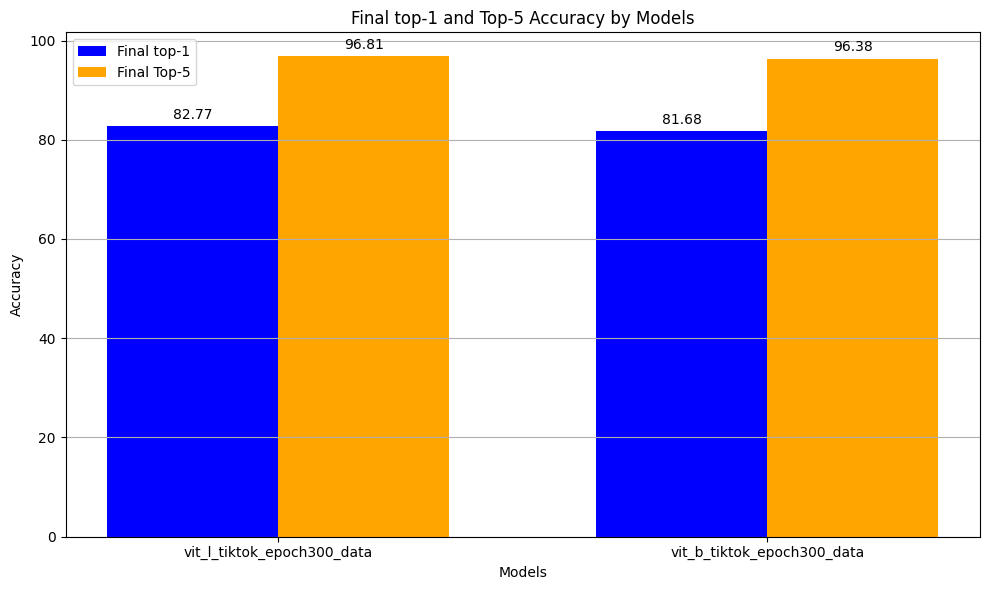

In [9]:
def autolabel(rects, ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# 柱状图 for Final top-1 and Top-5
labels = ['vit_l_tiktok_epoch300_data', 'vit_b_tiktok_epoch300_data']
final_top1 = [vit_l_tiktok_epoch300_data[4], vit_b_tiktok_epoch300_data[4]]
final_top5 = [vit_l_tiktok_epoch300_data[5], vit_b_tiktok_epoch300_data[5]]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, final_top1, width, label='Final top-1', color='blue')
rects2 = ax.bar(x + width/2, final_top5, width, label='Final Top-5', color='orange')

# Add the actual numbers on top of the bars
autolabel(rects1, ax)
autolabel(rects2, ax)

ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Final top-1 and Top-5 Accuracy by Models')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid(axis='y')

plt.tight_layout()
plt.show()

In [6]:
vit_b_tiktok_samplerate4_data = parse_log_file('work_dir/vit_b_tiktok6000_ucf101_sampling_rate4_1_ft/log.txt')
vit_b_tiktok_samplerate8_data = parse_log_file('work_dir/vit_b_tiktok6000_ucf101_sampling_rate8_1_ft/log.txt')

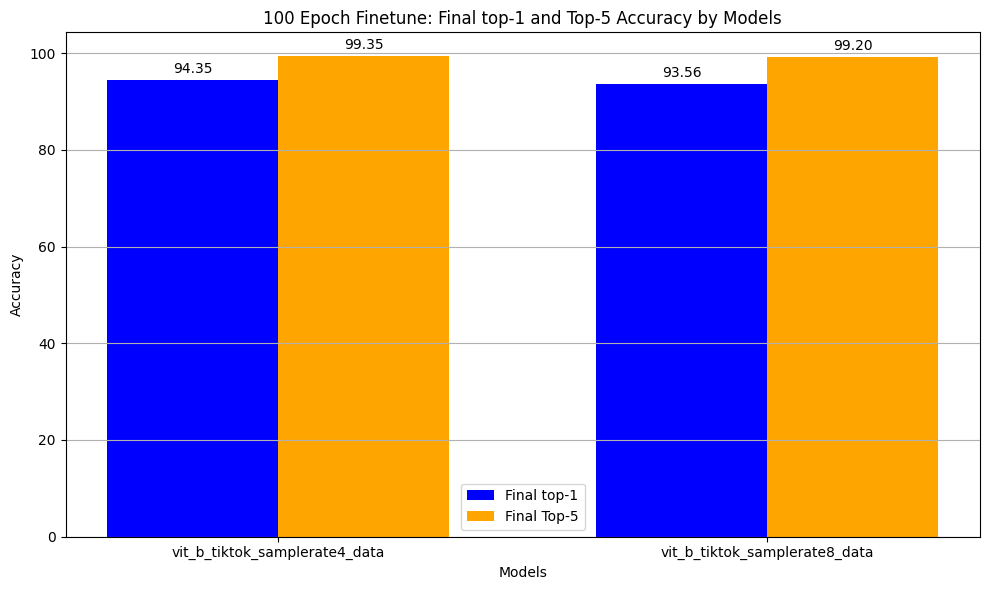

In [7]:
# 柱状图 for Final top-1 and Top-5
labels = ['vit_b_tiktok_samplerate4_data', 'vit_b_tiktok_samplerate8_data']
final_top1 = [vit_b_tiktok_samplerate4_data[4], vit_b_tiktok_samplerate8_data[4]]
final_top5 = [vit_b_tiktok_samplerate4_data[5], vit_b_tiktok_samplerate8_data[5]]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, final_top1, width, label='Final top-1', color='blue')
rects2 = ax.bar(x + width/2, final_top5, width, label='Final Top-5', color='orange')

# Add the actual numbers on top of the bars
autolabel(rects1, ax)
autolabel(rects2, ax)

ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('100 Epoch Finetune: Final top-1 and Top-5 Accuracy by Models')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid(axis='y')

plt.tight_layout()
plt.show()